# **Sun-as-a-star analysis of coronal high-frequency quasi-periodic oscillations observed by an iPhone during the total solar eclipse of 20 April 2023 with 240 fps imaging**
### **Data Processing and Analysis Notebook**

**Authors**: [Yu Liang]
**Affiliation**: [Shanghai Astronomical Observatory, Chinese Academy of Sciences, Shanghai 200030, China]  
**Contact**: [yuliang@shao.ac.cn]  
**Last Updated**: [2024-12-10]  

---

### **Notebook Overview**

These Jupyter Notebook documents the processing and analysis of observational data collected during the 2023 total solar eclipse. The primary objectives of this Notebook include:

1. Preprocessing of raw white-light corona imaging data (dark field subtraction, flat field correction, and temporal registration).
2. Application of wavelet analysis to detect high-frequency quasi-periodic oscillations (HFQPOs).
3. Visualizations of the solar corona and statistical results for Sun-as-a-star analysis.

---

### **Dependencies**

The analysis relies on the following Python libraries (compatible versions):  
- `numpy==1.2.43`  
- `pandas==1.5.1`  
- `scikit-image==0.20.0`  
- `matplotlib==3.7.1`  
- `astropy==5.1.1`  
- `opencv-python==4.7.0.72`  
- `Pillow==9.2.0`  
- `scipy==1.13.1`  


<!-- A complete list of dependencies can be found in the accompanying `requirements.txt`. -->

---

### **Data Source**

- **Observation Site**: Learmonth Airport, Australia  
- **Instrument**: iPhone with 565 nm filter, sampling at 240 fps, frams width * height: 720.0 * 1280.0, image shape:(1280, 720, 3)  
- **Date**: April 20, 2023  

---

### **Main Structure**

- **Section 1**: Data loading and inspection  
- **Section 2**: Preprocessing (dark field, flat field, and registration)  
- **Section 3**: Wavelet analysis and signal detection  
- **Section 4**: Results visualization and discussion  

---
### **Notebook figure - Scatter **
#### The scatter figure. 

/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_33203/2608362926.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


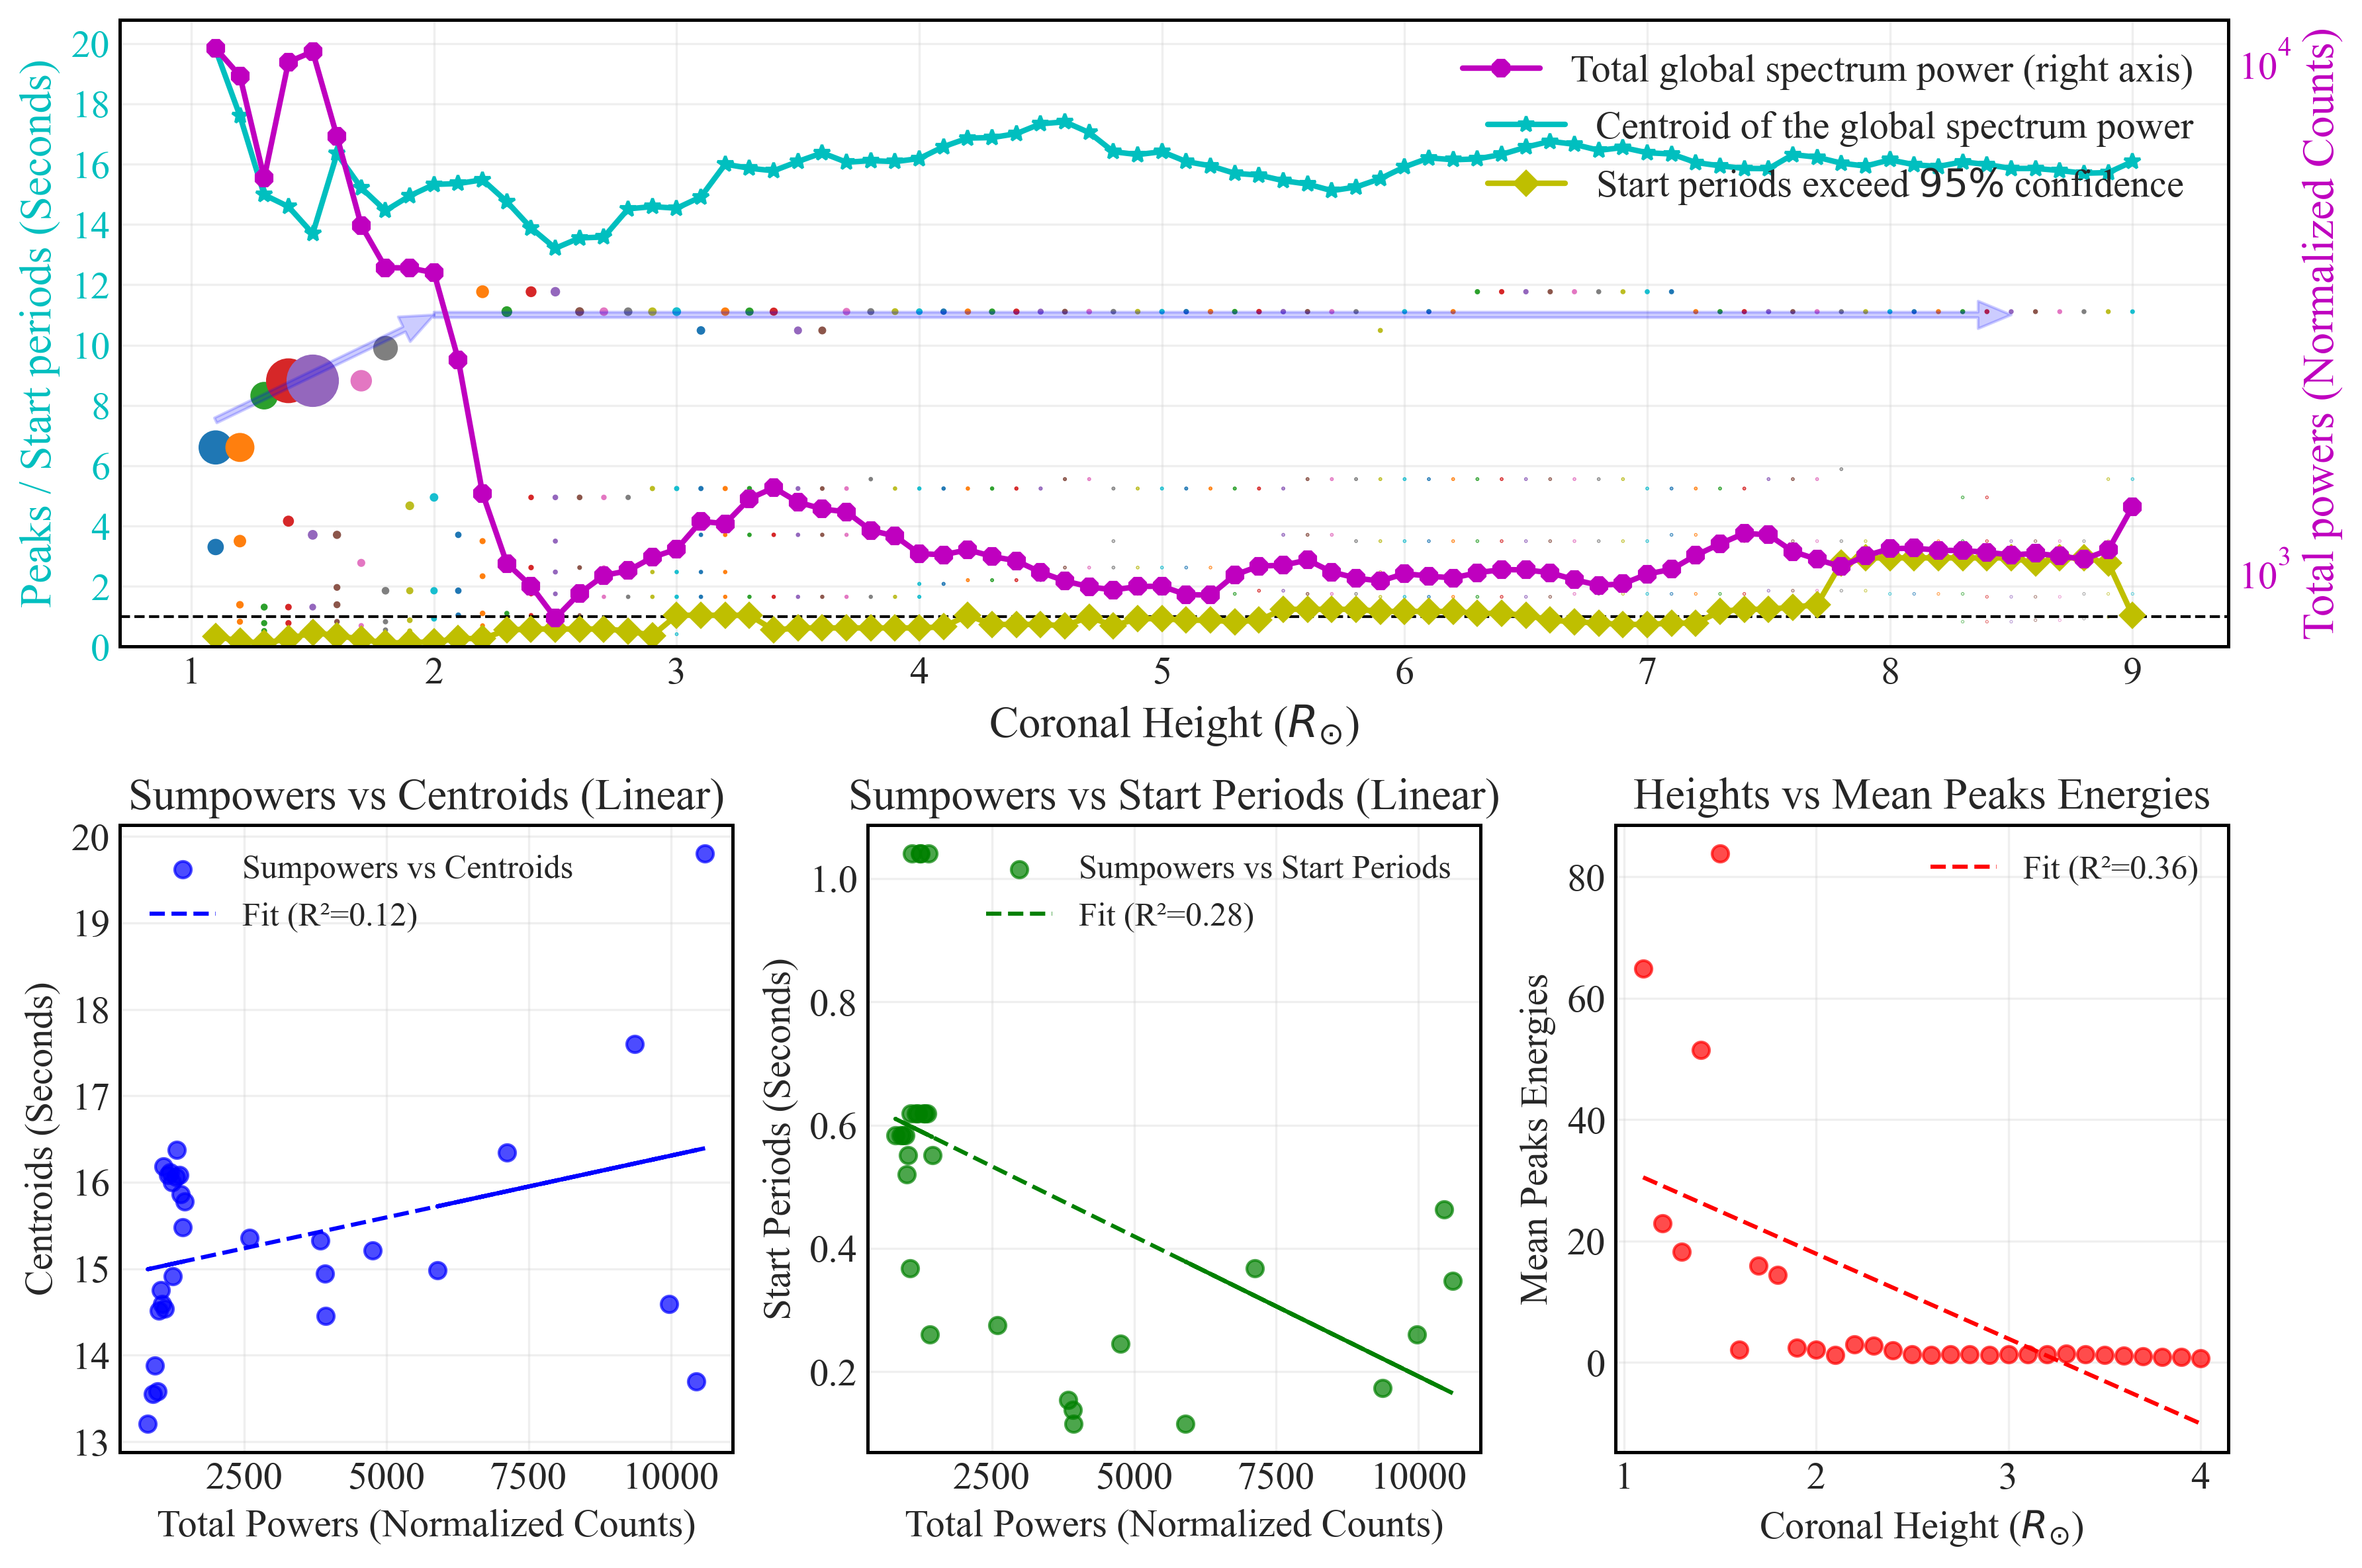

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator

# Set plot style to simple background
plt.style.use('seaborn-white')

# Set global font and image parameters
plt.rcParams.update({
    'font.family': 'serif',             # Use serif font, aligned with Nature style
    'font.serif': ['Times New Roman'],  # Set font to Times New Roman
    'axes.titlesize': 20,               # Axis title font size
    'axes.labelsize': 16,               # Axis label font size
    'xtick.labelsize': 14,              # x-axis tick label font size
    'ytick.labelsize': 14,              # y-axis tick label font size
    'legend.fontsize': 14,              # Legend font size
    'figure.dpi': 300,                  # Image resolution 300 DPI
    'savefig.dpi': 300,                 # Save image with 300 DPI
    'axes.linewidth': 1.2,              # Axis line width
    'axes.edgecolor': 'black',          # Axis border color
    'grid.alpha': 0.5                   # Grid transparency
})

# Define the number of data groups for the first 30 groups
num_groups = 30  # Adjustable variable, change this value to select different numbers of data groups

# Load data
heights_selected = np.arange(1.1, 9.1, 0.1)
peaks, values, centroids, sumpowers, start_periods = [], [], [], [], []

for i in range(11, 91):  # Load data from peaks11 to peaks85
    j = i / 10
    peaks.append(np.load(f'./output/peaks_periods{j}.npy'))
    values.append(np.load(f'./output/peaks_power{j}.npy'))
    centroids.append(np.load(f'./output/centroid{j}.npy'))
    sumpowers.append(np.load(f'./output/sumpower{j}.npy'))
    start_periods.append(np.load(f'./output/start_period{j}.npy'))

# Data processing
values_selected = peaks
energies = values

# Create figure object with gridspec layout
fig = plt.figure(figsize=(12, 8))  # Make the image taller to accommodate more subplots
gs = fig.add_gridspec(2, 3)  # Adjust the height of subplot 1 to 0.5, leaving subplot 2-3 to occupy 1/3

# Subplot 1: Plotted on top, occupying the upper half
ax1 = fig.add_subplot(gs[0, :])  # Occupy all three columns in the first row

# Plot scatter plot
for i, height in enumerate(heights_selected):
    energy_size = np.array(energies[i]) * 0.8  # Point size proportional to energy
    ax1.scatter(
        [height] * len(energies[i]),  # Height fixed as the x-coordinate
        values_selected[i],           # Peak values as the y-coordinate
        s=energy_size,                # Point size
        alpha=1                     # Semi-transparency
    )

ax1.axhline(y=1, color='black', linestyle='--', linewidth=1)
# Create a second y-axis that shares the x-axis
ax5 = ax1.twinx()

# Plot centroids data
ax1.plot(heights_selected, centroids, 'c-*', label='Centroid of the global spectrum power', linewidth=2)
ax1.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=16)
ax1.set_ylabel('Peaks / Start periods (Seconds)', color='c', fontsize=16)
ax1.tick_params(axis='y', labelcolor='c')
ax1.set_ylim(bottom=0)  # Set the minimum value of y-axis to 0

# Plot sumpowers data
ax5.plot(heights_selected, sumpowers, 'm-8', label='Total global spectrum power (right axis)', linewidth=2)
ax5.set_ylabel('Total powers (Normalized Counts)', color='m', fontsize=16)
ax5.tick_params(axis='y', labelcolor='m')
ax5.set_yscale('log')  # Set logarithmic scale for the right y-axis

# Plot start_periods data
ax1.plot(heights_selected, start_periods, 'y-D', label='Start periods exceed $95 \%$ confidence', linewidth=2)

# Set x-axis labels and ticks
ax1.tick_params(axis='x', labelsize=14)
# Set y-axis tick interval to 0.5
ax1.yaxis.set_major_locator(MultipleLocator(2))  # Set y-axis tick interval to 0.5
# Add legend
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 0.91), frameon=False)
ax5.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1), frameon=False)

# Remove top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add grid
ax1.grid(True, alpha=0.3)

# Draw the first arrow (indicating increase)
ax1.annotate('', xy=(8.5, 11), xytext=(2.0, 11), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=2, headwidth=10))

# Draw the second arrow (indicating stability)
ax1.annotate('', xy=(2.0, 11), xytext=(1.1, 7.5), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=2, headwidth=10))

# Subplot 2 and 3: Below, each subplot occupies 1/3
ax2 = fig.add_subplot(gs[1, 0])  # Subplot 2 occupies the first position in the second row
ax3 = fig.add_subplot(gs[1, 1])  # Subplot 3 occupies the second position in the second row
ax4 = fig.add_subplot(gs[1, 2])  # Subplot 4 occupies the third position in the second row

# Subplot 2: sumpowers vs centroids (Linear correlation analysis)
sumpowers_15 = sumpowers[:num_groups]
centroids_15 = centroids[:num_groups]
ax2.scatter(sumpowers_15, centroids_15, color='blue', alpha=0.7, label='Sumpowers vs Centroids')
slope, intercept, r_value, _, _ = linregress(sumpowers_15, centroids_15)
ax2.plot(
    sumpowers_15,
    slope * np.array(sumpowers_15) + intercept,
    'b--',
    label=f'Fit (R²={r_value**2:.2f})'
)
ax2.set_xlabel('Total Powers (Normalized Counts)', fontsize=14)
ax2.set_ylabel('Centroids (Seconds)', fontsize=14)
ax2.legend(fontsize=12)
ax2.set_title('Sumpowers vs Centroids (Linear)', fontsize=16)
ax2.grid(True, alpha=0.3)

# Subplot 3: sumpowers vs start_periods (Linear correlation analysis)
start_periods_15 = start_periods[:num_groups]
ax3.scatter(sumpowers_15, start_periods_15, color='green', alpha=0.7, label='Sumpowers vs Start Periods')
slope, intercept, r_value, _, _ = linregress(sumpowers_15, start_periods_15)
ax3.plot(
    sumpowers_15,
    slope * np.array(sumpowers_15) + intercept,
    'g--',
    label=f'Fit (R²={r_value**2:.2f})'
)
ax3.set_xlabel('Total Powers (Normalized Counts)', fontsize=14)
ax3.set_ylabel('Start Periods (Seconds)', fontsize=14)
ax3.legend(fontsize=12)
ax3.set_title('Sumpowers vs Start Periods (Linear)', fontsize=16)
ax3.grid(True, alpha=0.3)

# Subplot 4: heights vs mean_energies
mean_energies = [np.mean(energy) for energy in values[:num_groups]]
heights_num_groups = heights_selected[:num_groups]
ax4.scatter(heights_num_groups, mean_energies, color='red', alpha=0.7)
slope, intercept, r_value, _, _ = linregress(heights_num_groups, mean_energies)
ax4.plot(
    heights_num_groups,
    slope * np.array(heights_num_groups) + intercept,
    'r--',
    label=f'Fit (R²={r_value**2:.2f})'
)
ax4.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=14)
ax4.set_ylabel('Mean Peaks Energies', fontsize=14)
ax4.legend(fontsize=12)
ax4.set_title('Heights vs Mean Peaks Energies', fontsize=16)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
savepath = './output/'
plt.savefig(savepath + 'scatter2.png', bbox_inches='tight')
plt.show()

# Display the figure
plt.show()


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_33203/2520385922.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


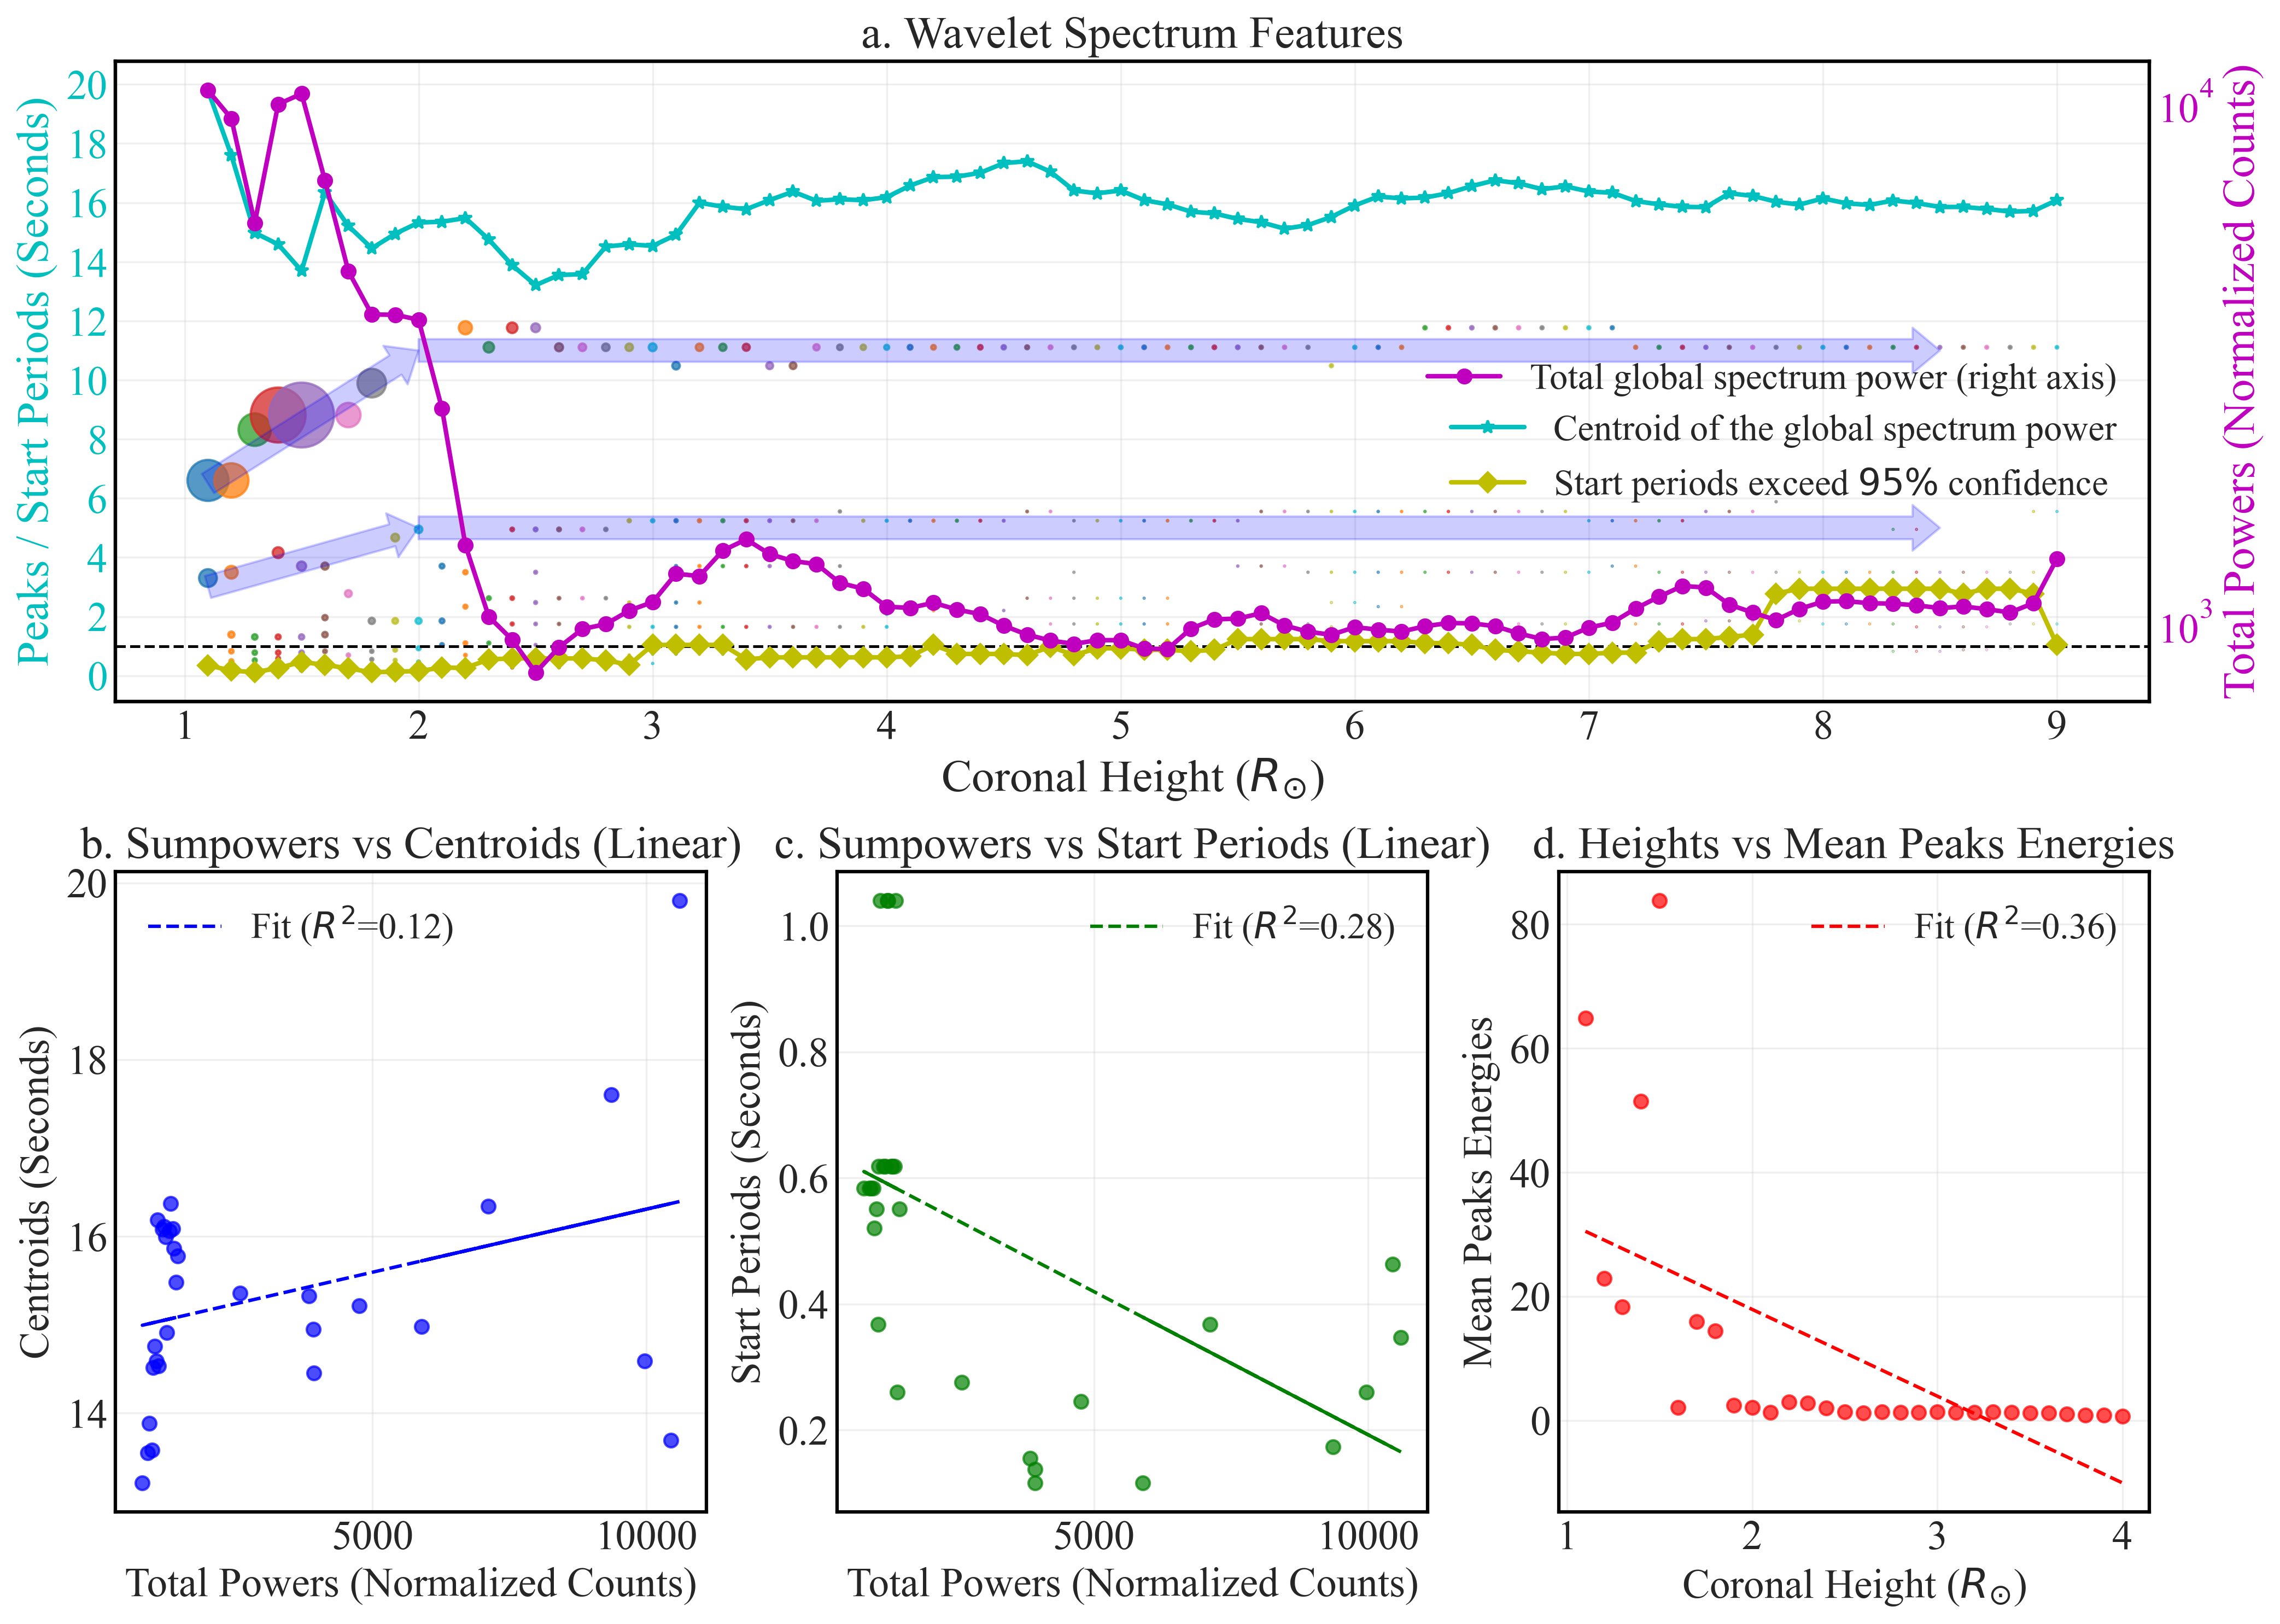

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator

# Set plot style to match Nature-like aesthetics
plt.style.use('seaborn-white')

# Update global font and figure parameters
plt.rcParams.update({
    'font.family': 'serif',             # Use serif fonts for a professional look
    'font.serif': ['Times New Roman'],  # Times New Roman for text consistency
    'axes.titlesize': 24,               # Larger title font size
    'axes.labelsize': 20,               # Larger axis label font size
    'xtick.labelsize': 18,              # Larger x-axis tick font size
    'ytick.labelsize': 18,              # Larger y-axis tick font size
    'legend.fontsize': 18,              # Larger legend font size
    'figure.dpi': 300,                  # High-resolution figures (300 DPI)
    'savefig.dpi': 300,                 # Save figures with 300 DPI
    'axes.linewidth': 1.5,              # Thicker axis lines for clarity
    'axes.edgecolor': 'black',          # Black edges for axes
    'grid.alpha': 0.5                   # Transparent grid lines
})

# Number of data groups for processing
num_groups = 30

# Load data for visualization
heights_selected = np.arange(1.1, 9.1, 0.1)
peaks, values, centroids, sumpowers, start_periods = [], [], [], [], []

for i in range(11, 91):
    j = i / 10
    peaks.append(np.load(f'./output/peaks_periods{j}.npy'))
    values.append(np.load(f'./output/peaks_power{j}.npy'))
    centroids.append(np.load(f'./output/centroid{j}.npy'))
    sumpowers.append(np.load(f'./output/sumpower{j}.npy'))
    start_periods.append(np.load(f'./output/start_period{j}.npy'))

values_selected = peaks
energies = values

# Create figure and grid layout
fig = plt.figure(figsize=(14, 10))  # Larger figure size for clarity
gs = fig.add_gridspec(2, 3)

# Subplot 1: Primary scatter plot and trendlines
ax1 = fig.add_subplot(gs[0, :])

for i, height in enumerate(heights_selected):
    energy_size = np.array(energies[i]) * 2.0
    ax1.scatter(
        [height] * len(energies[i]),
        values_selected[i],
        s=energy_size,
        alpha=0.75
    )

ax1.axhline(y=1, color='black', linestyle='--', linewidth=1.2)

# 画第一个箭头（表示上升）
ax1.annotate('', xy=(8.5, 11), xytext=(2.0, 11), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))

# 画第二个箭头（表示平稳）
ax1.annotate('', xy=(2.0, 11), xytext=(1.1, 6.5), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))
ax1.yaxis.set_major_locator(MultipleLocator(2))  # 设置y轴刻度间隔为0.5


# 画第一个箭头（表示上升）
ax1.annotate('', xy=(8.5, 5.0), xytext=(2.0, 5.0), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))


# 画第二个箭头（表示平稳）
ax1.annotate('', xy=(2.0, 5.0), xytext=(1.1, 3.0), 
arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))


ax5 = ax1.twinx()

# Plot data with clear legends
ax1.plot(heights_selected, centroids, 'c-*', label='Centroid of the global spectrum power', linewidth=2)
ax1.plot(heights_selected, start_periods, 'y-D', label='Start periods exceed $95\%$ confidence', linewidth=2)
ax1.set_title('a. Wavelet Spectrum Features', fontsize=20)
ax5.plot(heights_selected, sumpowers, 'm-o', label='Total global spectrum power (right axis)', linewidth=2)

# Configure axis labels and legends
ax1.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=20)
ax1.set_ylabel('Peaks / Start Periods (Seconds)', color='c', fontsize=20)
ax5.set_ylabel('Total Powers (Normalized Counts)', color='m', fontsize=20)
ax1.tick_params(axis='y', labelcolor='c')
ax5.tick_params(axis='y', labelcolor='m')
ax5.set_yscale('log')

ax1.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.5), frameon=False)
ax5.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1,0.58), frameon=False)

ax1.grid(True, alpha=0.3)




# Subplot 2: Sumpowers vs Centroids
ax2 = fig.add_subplot(gs[1, 0])
sumpowers_15 = sumpowers[:num_groups]
centroids_15 = centroids[:num_groups]
ax2.scatter(sumpowers_15, centroids_15, color='blue', alpha=0.7)
slope, intercept, r_value, _, _ = linregress(sumpowers_15, centroids_15)
ax2.plot(sumpowers_15, slope * np.array(sumpowers_15) + intercept, 'b--', label=f'Fit ($R^2$={r_value**2:.2f})')
ax2.set_xlabel('Total Powers (Normalized Counts)', fontsize=18)
ax2.set_ylabel('Centroids (Seconds)', fontsize=18)
ax2.set_title('b. Sumpowers vs Centroids (Linear)', fontsize=20)
ax2.legend(fontsize=16)
ax2.grid(True, alpha=0.3)

# Subplot 3: Sumpowers vs Start Periods
ax3 = fig.add_subplot(gs[1, 1])
start_periods_15 = start_periods[:num_groups]
ax3.scatter(sumpowers_15, start_periods_15, color='green', alpha=0.7)
slope, intercept, r_value, _, _ = linregress(sumpowers_15, start_periods_15)
ax3.plot(sumpowers_15, slope * np.array(sumpowers_15) + intercept, 'g--', label=f'Fit ($R^2$={r_value**2:.2f})')
ax3.set_xlabel('Total Powers (Normalized Counts)', fontsize=18)
ax3.set_ylabel('Start Periods (Seconds)', fontsize=18)
ax3.set_title('c. Sumpowers vs Start Periods (Linear)', fontsize=20)
ax3.legend(fontsize=16)
ax3.grid(True, alpha=0.3)

# Subplot 4: Heights vs Mean Energies
ax4 = fig.add_subplot(gs[1, 2])
mean_energies = [np.mean(energy) for energy in values[:num_groups]]
heights_num_groups = heights_selected[:num_groups]
ax4.scatter(heights_num_groups, mean_energies, color='red', alpha=0.7)
slope, intercept, r_value, _, _ = linregress(heights_num_groups, mean_energies)
ax4.plot(heights_num_groups, slope * np.array(heights_num_groups) + intercept, 'r--', label=f'Fit ($R^2$={r_value**2:.2f})')
ax4.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=18)
ax4.set_ylabel('Mean Peaks Energies', fontsize=18)
ax4.set_title('d. Heights vs Mean Peaks Energies', fontsize=20)
ax4.legend(fontsize=16)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
savepath = './output/'
plt.savefig(savepath + 'scatter.png', bbox_inches='tight')
plt.show()


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_33203/3636822094.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


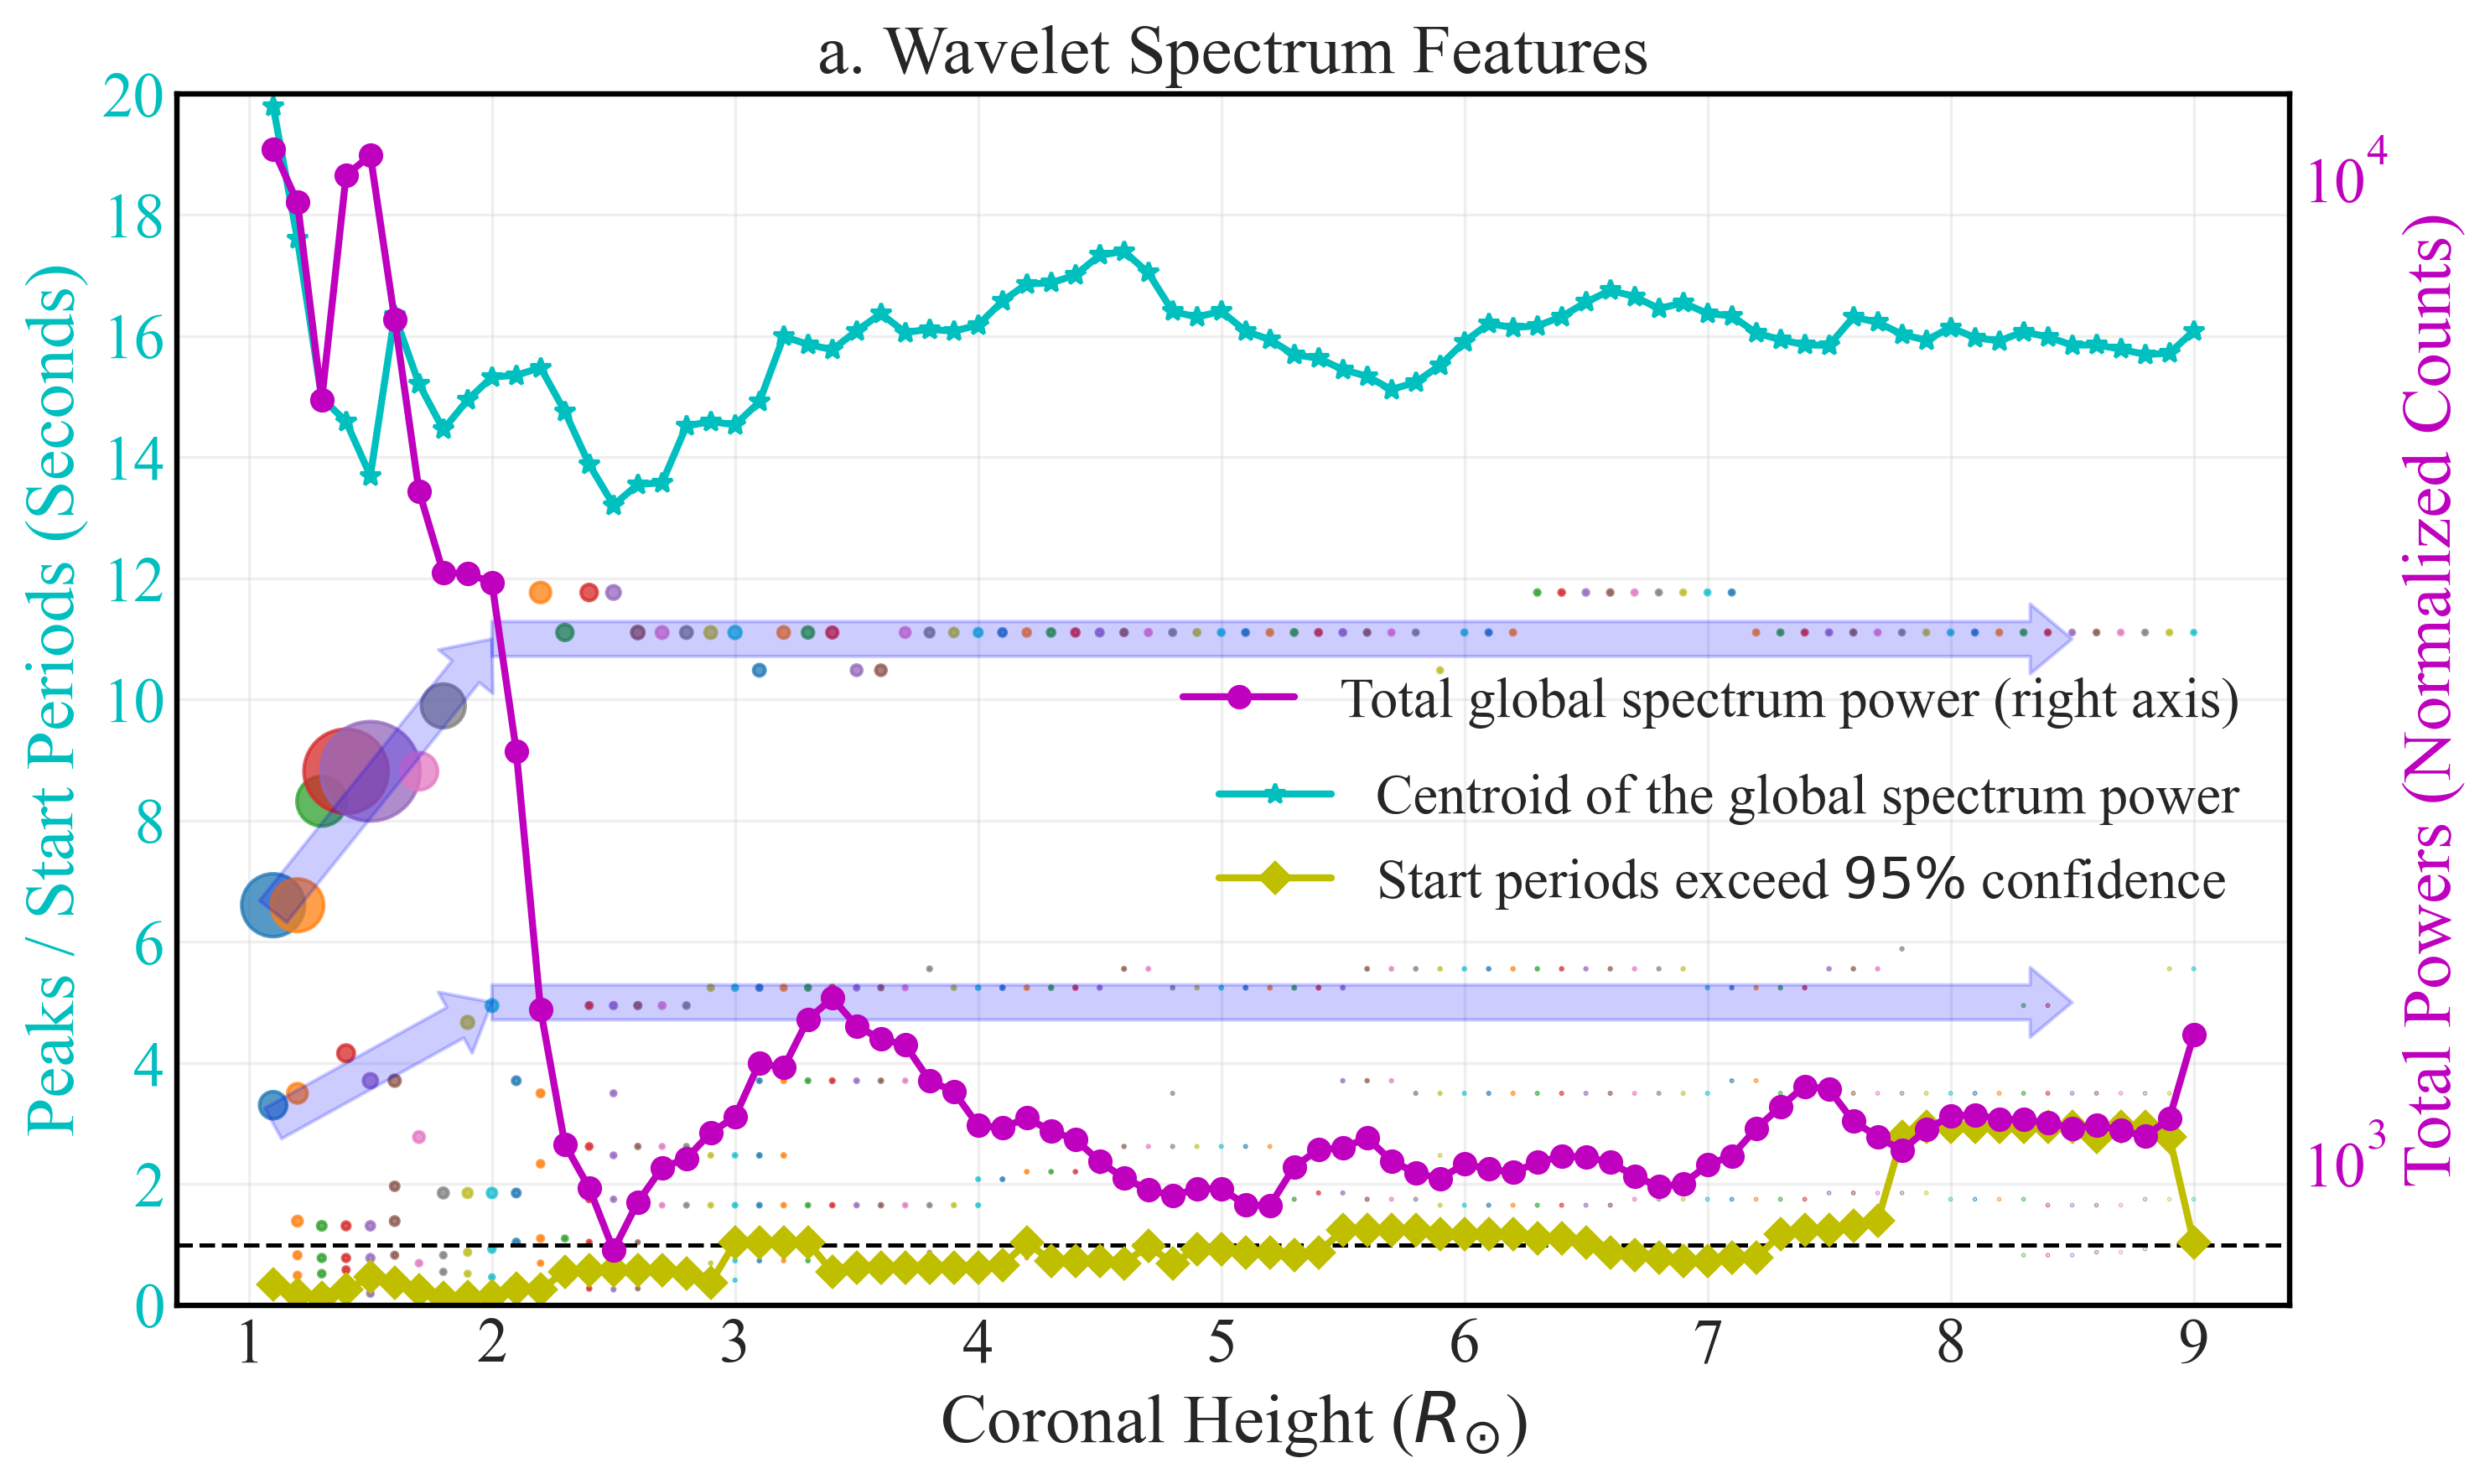

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator

# Set plot style to match Nature-like aesthetics
plt.style.use('seaborn-white')

# Update global font and figure parameters
plt.rcParams.update({
    'font.family': 'serif',             # Use serif fonts for a professional look
    'font.serif': ['Times New Roman'],  # Times New Roman for text consistency
    'axes.titlesize': 24,               # Larger title font size
    'axes.labelsize': 20,               # Larger axis label font size
    'xtick.labelsize': 18,              # Larger x-axis tick font size
    'ytick.labelsize': 18,              # Larger y-axis tick font size
    'legend.fontsize': 18,              # Larger legend font size
    'figure.dpi': 300,                  # High-resolution figures (300 DPI)
    'savefig.dpi': 300,                 # Save figures with 300 DPI
    'axes.linewidth': 1.5,              # Thicker axis lines for clarity
    'axes.edgecolor': 'black',          # Black edges for axes
    'grid.alpha': 0.5                   # Transparent grid lines
})

# Number of data groups for processing
num_groups = 30

# Load data for visualization
heights_selected = np.arange(1.1, 9.1, 0.1)
peaks, values, centroids, sumpowers, start_periods = [], [], [], [], []

for i in range(11, 91):
    j = i / 10
    peaks.append(np.load(f'./output/peaks_periods{j}.npy'))
    values.append(np.load(f'./output/peaks_power{j}.npy'))
    centroids.append(np.load(f'./output/centroid{j}.npy'))
    sumpowers.append(np.load(f'./output/sumpower{j}.npy'))
    start_periods.append(np.load(f'./output/start_period{j}.npy'))

values_selected = peaks
energies = values

# Create figure and grid layout
fig = plt.figure(figsize=(10,6),dpi=300)  # Larger figure size for clarity
gs = fig.add_gridspec(1,1)

# Subplot 1: Primary scatter plot and trendlines
ax1 = fig.add_subplot(gs[0, :])

for i, height in enumerate(heights_selected):
    energy_size = np.array(energies[i]) * 2.0
    ax1.scatter(
        [height] * len(energies[i]),
        values_selected[i],
        s=energy_size,
        alpha=0.75
    )

ax1.axhline(y=1, color='black', linestyle='--', linewidth=1.2)

# 画第一个箭头（表示上升）
ax1.annotate('', xy=(8.5, 11), xytext=(2.0, 11), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))

# 画第二个箭头（表示平稳）
ax1.annotate('', xy=(2.0, 11), xytext=(1.1, 6.5), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))
ax1.yaxis.set_major_locator(MultipleLocator(2))  # 设置y轴刻度间隔为0.5


# 画第一个箭头（表示上升）
ax1.annotate('', xy=(8.5, 5.0), xytext=(2.0, 5.0), 
            arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))


# 画第二个箭头（表示平稳）
ax1.annotate('', xy=(2.0, 5.0), xytext=(1.1, 3.0), 
arrowprops=dict(facecolor='blue', edgecolor='blue', 
                            alpha=0.2, shrinkA=0, shrinkB=0, 
                            width=10, headwidth=20))

ax1.set_ylim(bottom=0,top=20)
ax5 = ax1.twinx()

# Plot data with clear legends
ax1.plot(heights_selected, centroids, 'c-*', label='Centroid of the global spectrum power', linewidth=2)
ax1.plot(heights_selected, start_periods, 'y-D', label='Start periods exceed $95\%$ confidence', linewidth=2)
ax1.set_title('a. Wavelet Spectrum Features', fontsize=20)
ax5.plot(heights_selected, sumpowers, 'm-o', label='Total global spectrum power (right axis)', linewidth=2)

# Configure axis labels and legends
ax1.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=20)
ax1.set_ylabel('Peaks / Start Periods (Seconds)', color='c', fontsize=20)
ax5.set_ylabel('Total Powers (Normalized Counts)', color='m', fontsize=20)
ax1.tick_params(axis='y', labelcolor='c')
ax5.tick_params(axis='y', labelcolor='m')
ax5.set_yscale('log')

ax1.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.48), frameon=False)
ax5.legend(fontsize=16, loc='upper right', bbox_to_anchor=(1, 0.56), frameon=False)

ax1.grid(True, alpha=0.3)

# # Subplot 2: Sumpowers vs Centroids
# ax2 = fig.add_subplot(gs[1, 0])
# sumpowers_15 = sumpowers[:num_groups]
# centroids_15 = centroids[:num_groups]
# ax2.scatter(sumpowers_15, centroids_15, color='blue', alpha=0.7)
# slope, intercept, r_value, _, _ = linregress(sumpowers_15, centroids_15)
# ax2.plot(sumpowers_15, slope * np.array(sumpowers_15) + intercept, 'b--', label=f'Fit ($R^2$={r_value**2:.2f})')
# ax2.set_xlabel('Total Powers (Normalized Counts)', fontsize=18)
# ax2.set_ylabel('Centroids (Seconds)', fontsize=18)
# ax2.set_title('b. Sumpowers vs Centroids (Linear)', fontsize=20)
# ax2.legend(fontsize=16)
# ax2.grid(True, alpha=0.3)

# # Subplot 3: Sumpowers vs Start Periods
# ax3 = fig.add_subplot(gs[1, 1])
# start_periods_15 = start_periods[:num_groups]
# ax3.scatter(sumpowers_15, start_periods_15, color='green', alpha=0.7)
# slope, intercept, r_value, _, _ = linregress(sumpowers_15, start_periods_15)
# ax3.plot(sumpowers_15, slope * np.array(sumpowers_15) + intercept, 'g--', label=f'Fit ($R^2$={r_value**2:.2f})')
# ax3.set_xlabel('Total Powers (Normalized Counts)', fontsize=18)
# ax3.set_ylabel('Start Periods (Seconds)', fontsize=18)
# ax3.set_title('c. Sumpowers vs Start Periods (Linear)', fontsize=20)
# ax3.legend(fontsize=16)
# ax3.grid(True, alpha=0.3)

# # Subplot 4: Heights vs Mean Energies
# ax4 = fig.add_subplot(gs[1, 2])
# mean_energies = [np.mean(energy) for energy in values[:num_groups]]
# heights_num_groups = heights_selected[:num_groups]
# ax4.scatter(heights_num_groups, mean_energies, color='red', alpha=0.7)
# slope, intercept, r_value, _, _ = linregress(heights_num_groups, mean_energies)
# ax4.plot(heights_num_groups, slope * np.array(heights_num_groups) + intercept, 'r--', label=f'Fit ($R^2$={r_value**2:.2f})')
# ax4.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=18)
# ax4.set_ylabel('Mean Peaks Energies', fontsize=18)
# ax4.set_title('d. Heights vs Mean Peaks Energies', fontsize=20)
# ax4.legend(fontsize=16)
# ax4.grid(True, alpha=0.3)

plt.tight_layout()
savepath = './output/'
plt.savefig(savepath + 'scatter.png', bbox_inches='tight')
plt.show()


/var/folders/j1/t8_gk27x5wq61xjjlpw5qqcw0000gn/T/ipykernel_33203/3309321952.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


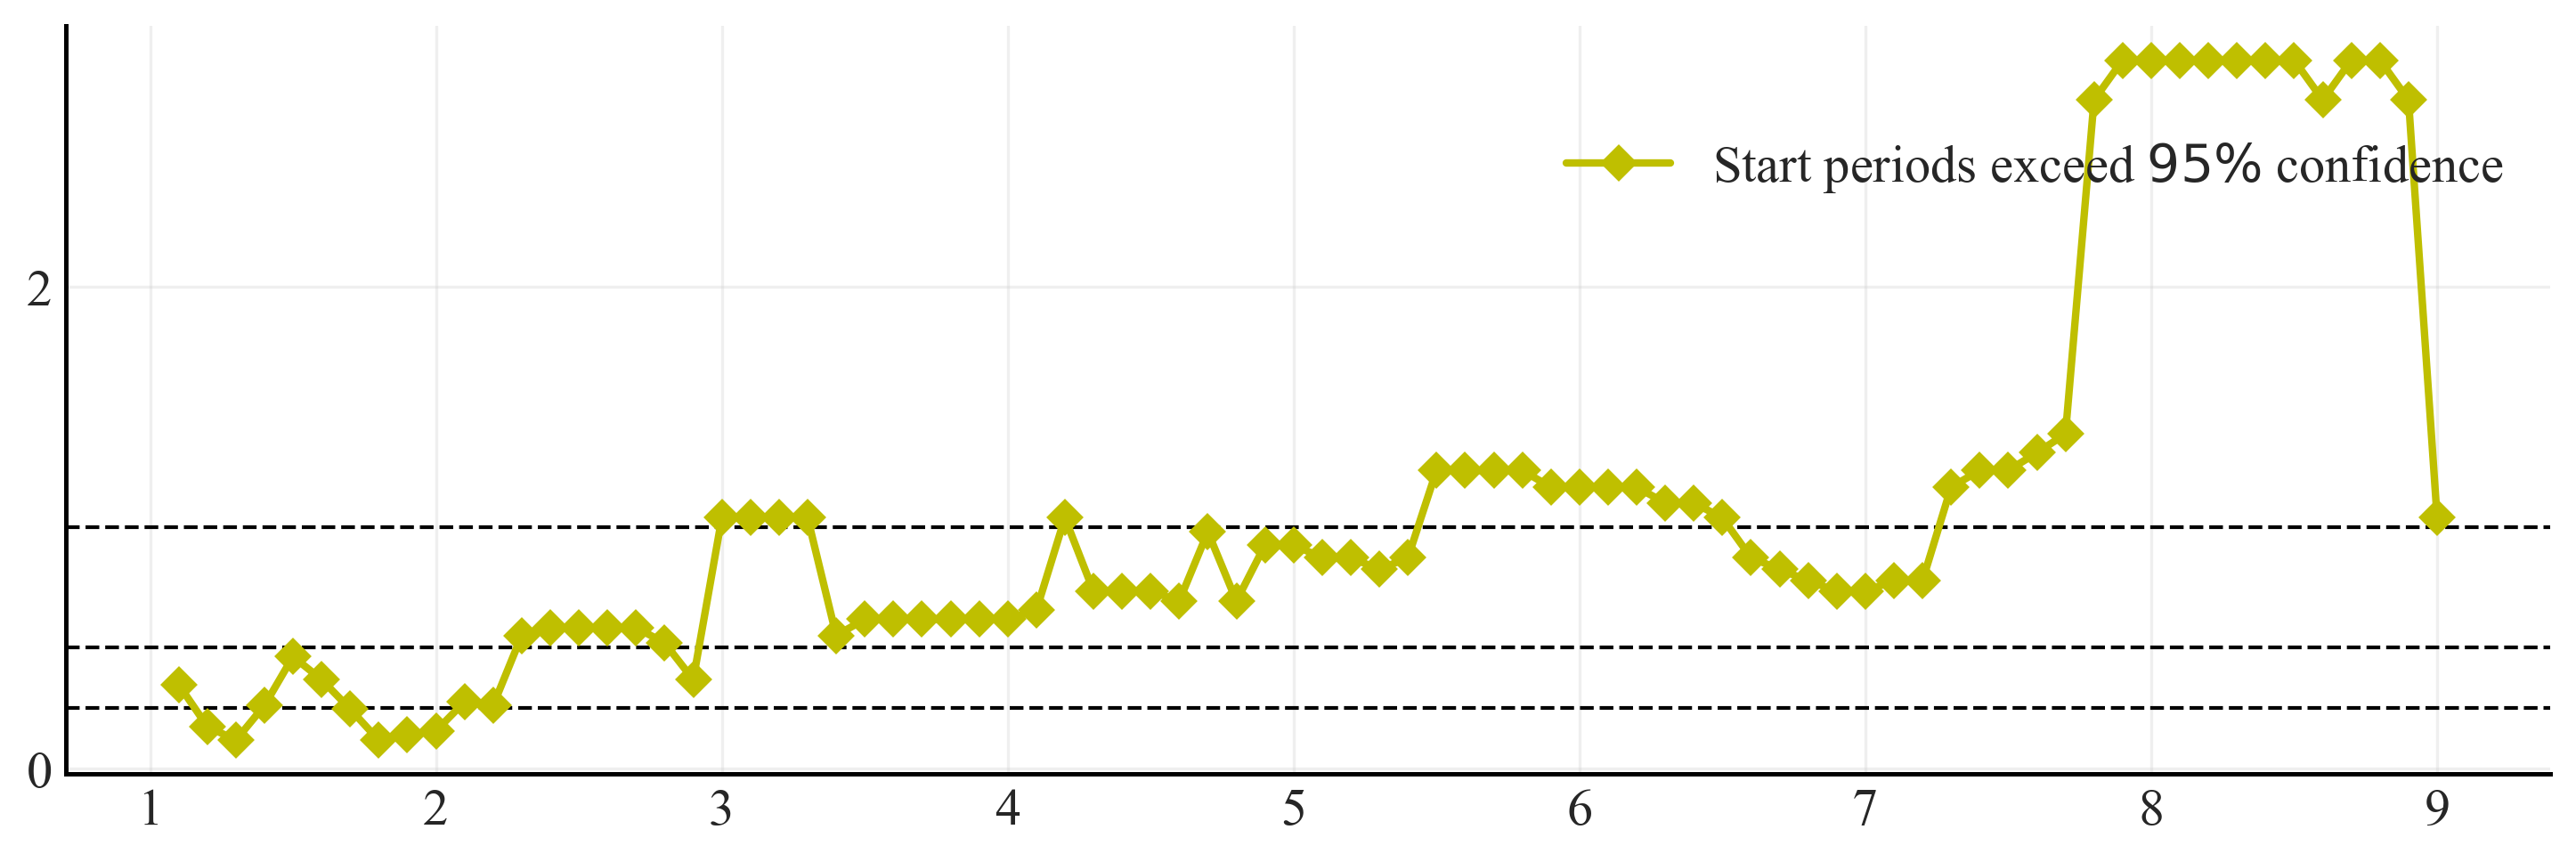

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator

# Set the plot style to a clean background
plt.style.use('seaborn-white')

# Update global font and figure parameters
plt.rcParams.update({
    'font.family': 'serif',             # Use serif font, matching the Nature style
    'font.serif': ['Times New Roman'],  # Set font to Times New Roman
    'axes.titlesize': 20,               # Axis title font size
    'axes.labelsize': 16,               # Axis label font size
    'xtick.labelsize': 14,              # x-axis tick font size
    'ytick.labelsize': 14,              # y-axis tick font size
    'legend.fontsize': 14,              # Legend font size
    'figure.dpi': 300,                  # Figure resolution at 300 DPI
    'savefig.dpi': 300,                 # Save figure at 300 DPI
    'axes.linewidth': 1.2,              # Axis line width
    'axes.edgecolor': 'black',          # Axis edge color
    'grid.alpha': 0.5                   # Grid transparency
})

# Define the number of groups of data to use
num_groups = 30  # Adjustable variable, change this value to select a different number of groups

# Load data
heights_selected = np.arange(1.1, 9.1, 0.1)
peaks, values, centroids, sumpowers, start_periods = [], [], [], [], []

for i in range(11, 91):  # Load data from peaks11 to peaks85
    j = i / 10
    peaks.append(np.load(f'./output/peaks_periods{j}.npy'))
    values.append(np.load(f'./output/peaks_power{j}.npy'))
    centroids.append(np.load(f'./output/centroid{j}.npy'))
    sumpowers.append(np.load(f'./output/sumpower{j}.npy'))
    start_periods.append(np.load(f'./output/start_period{j}.npy'))

# Data processing
values_selected = peaks
energies = values

# Create figure object and use gridspec for layout
fig = plt.figure(figsize=(12, 8))  # Make the figure taller to accommodate more subplots
gs = fig.add_gridspec(2, 3)  # Adjust subplot 1 height to 0.5, keep subplots 2-3 occupying 1/3

# Subplot 1: Draw in the top half
ax1 = fig.add_subplot(gs[0, :])  # Occupy all three columns of the first row

# # Draw scatter plot
# for i, height in enumerate(heights_selected):
#     energy_size = np.array(energies[i]) * 0.8  # Point size proportional to energy
#     ax1.scatter(
#         [height] * len(energies[i]),  # Height fixed as the x-coordinate
#         values_selected[i],           # Peak value as the y-coordinate
#         s=energy_size,                # Point size
#         alpha=1                     # Transparency
#     )

ax1.axhline(y=1, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.25, color='black', linestyle='--', linewidth=1)
ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=1)

# # Create a second y-axis with shared x-axis
# ax5 = ax1.twinx()

# # Plot centroids data
# ax1.plot(heights_selected, centroids, 'c-*', label='Centroid of the global spectrum power', linewidth=2)
# ax1.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=16)
# ax1.set_ylabel('Peaks / Start periods (Seconds)', color='c', fontsize=16)
# ax1.tick_params(axis='y', labelcolor='c')
# ax1.set_ylim(bottom=0)  # Limit the minimum value of y-axis to 0

# # Plot sumpowers data
# ax5.plot(heights_selected, sumpowers, 'm-8', label='Total global spectrum power(right axis)', linewidth=2)
# ax5.set_ylabel('Total powers (Normalized Counts)', color='m', fontsize=16)
# ax5.tick_params(axis='y', labelcolor='m')
# ax5.set_yscale('log')  # Log scale for the right y-axis

# Plot start_periods data
ax1.plot(heights_selected, start_periods, 'y-D', label='Start periods exceed $95 \%$ confidence', linewidth=2)

# Set x-axis labels and ticks
ax1.tick_params(axis='x', labelsize=14)
# Set the y-axis tick interval to 0.5
ax1.yaxis.set_major_locator(MultipleLocator(2))  # Set y-axis tick interval to 0.5
# Add legend
ax1.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 0.91), frameon=False)
# ax5.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1), frameon=False)

# Remove top and right borders
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add grid
ax1.grid(True, alpha=0.3)

# # Draw the first arrow (indicating an increase)
# ax1.annotate('', xy=(8.5, 11), xytext=(2.0, 11), 
#             arrowprops=dict(facecolor='blue', edgecolor='blue', 
#                             alpha=0.2, shrinkA=0, shrinkB=0, 
#                             width=2, headwidth=10))

# # Draw the second arrow (indicating stability)
# ax1.annotate('', xy=(2.0, 11), xytext=(1.1, 7.5), 
#             arrowprops=dict(facecolor='blue', edgecolor='blue', 
#                             alpha=0.2, shrinkA=0, shrinkB=0, 
#                             width=2, headwidth=10))

# # Draw the first arrow (indicating an increase)
# ax1.annotate('', xy=(8.5, 5.0), xytext=(2.0, 5.0), 
#             arrowprops=dict(facecolor='green', edgecolor='green', 
#                             alpha=0.2, shrinkA=0, shrinkB=0, 
#                             width=2, headwidth=10))

# # Draw the second arrow (indicating stability)
# ax1.annotate('', xy=(2.0, 5.0), xytext=(1.1, 2.0), 
#             arrowprops=dict(facecolor='green', edgecolor='green', 
#                             alpha=0.2, shrinkA=0, shrinkB=0, 
#                             width=2, headwidth=10))



# # Subplots 2 and 3: Each occupies 1/3 of the lower part
# ax2 = fig.add_subplot(gs[1, 0])  # Subplot 2 occupies the first position in the second row
# ax3 = fig.add_subplot(gs[1, 1])  # Subplot 3 occupies the second position in the second row
# ax4 = fig.add_subplot(gs[1, 2])  # Subplot 4 occupies the third position in the second row

# # Subplot 2: Sumpowers vs Centroids (Linear correlation analysis)
# sumpowers_15 = sumpowers[:num_groups]
# centroids_15 = centroids[:num_groups]
# ax2.scatter(sumpowers_15, centroids_15, color='blue', alpha=0.7, label='Sumpowers vs Centroids')
# slope, intercept, r_value, _, _ = linregress(sumpowers_15, centroids_15)
# ax2.plot(
#     sumpowers_15,
#     slope * np.array(sumpowers_15) + intercept,
#     'b--',
#     label=f'Fit (R²={r_value**2:.2f})'
# )
# ax2.set_xlabel('Total Powers (Normalized Counts)', fontsize=14)
# ax2.set_ylabel('Centroids (Seconds)', fontsize=14)
# ax2.legend(fontsize=12)
# ax2.set_title('Sumpowers vs Centroids (Linear)', fontsize=16)
# ax2.grid(True, alpha=0.3)

# # Subplot 3: Sumpowers vs Start_periods (Linear correlation analysis)
# start_periods_15 = start_periods[:num_groups]
# ax3.scatter(sumpowers_15, start_periods_15, color='green', alpha=0.7, label='Sumpowers vs Start Periods')
# slope, intercept, r_value, _, _ = linregress(sumpowers_15, start_periods_15)
# ax3.plot(
#     sumpowers_15,
#     slope * np.array(sumpowers_15) + intercept,
#     'g--',
#     label=f'Fit (R²={r_value**2:.2f})'
# )
# ax3.set_xlabel('Total Powers (Normalized Counts)', fontsize=14)
# ax3.set_ylabel('Start Periods (Seconds)', fontsize=14)
# ax3.legend(fontsize=12)
# ax3.set_title('Sumpowers vs Start Periods (Linear)', fontsize=16)
# ax3.grid(True, alpha=0.3)

# # Subplot 4: Heights vs Mean Energies
# mean_energies = [np.mean(energy) for energy in values[:num_groups]]
# heights_num_groups = heights_selected[:num_groups]
# ax4.scatter(heights_num_groups, mean_energies, color='red', alpha=0.7)
# slope, intercept, r_value, _, _ = linregress(heights_num_groups, mean_energies)
# ax4.plot(
#     heights_num_groups,
#     slope * np.array(heights_num_groups) + intercept,
#     'r--',
#     label=f'Fit (R²={r_value**2:.2f})'
# )
# ax4.set_xlabel('Coronal Height ($R_{\odot}$)', fontsize=14)
# ax4.set_ylabel('Mean Peaks Energies', fontsize=14)
# ax4.legend(fontsize=12)
# ax4.set_title('Heights vs Mean Peaks Energies', fontsize=16)
# ax4.grid(True, alpha=0.3)

# plt.tight_layout()
# savepath = './output/'
# plt.savefig(savepath + 'scatter2.png', bbox_inches='tight')
# plt.show()

# Show the plot
plt.show()